# Commodity momentum

This notebook analyses commodity cross-sectional momentum strategy. The strategy takes long positions on contracts with best 1-year perfomance and short positions on ones with worst 1-year performance.

In [1]:
%matplotlib inline
from datetime import datetime
import logging
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.style.use('bmh')

from vivace.backtest import signal
from vivace.backtest import processing
from vivace.backtest.contract import all_futures_hollstein2020
from vivace.backtest.engine import BacktestEngine
from vivace.backtest.enums import Strategy
from vivace.backtest.stats import Performance

# Data

26 commodity futures are used as per Hollstein 2020.

In [2]:
all_futures_hollstein2020

,name
ticker,
CO,Brent Crude Oil
CC,Cocoa
KC,Coffee
C,Corn
CT,Cotton
FC,Feeder Cattle
GC,Gold
HO,Heating Oil
HG,Copper


In [3]:
all_futures_hollstein2020.shape

(26, 1)

# Performance

## Run backtest

A simple portfolio is constructed by using trailing 1-year returns of each commodity futures. Unlike studies in equities, the recent 1-month is included in the formation period. Positions are rebalanced on a monthly basis.

Similar to other popular academic strategies, this commodity momentum signal has been stalling since around 2015.

In [4]:
engine = BacktestEngine(
    strategy=Strategy.DELTA_ONE.value,
    instrument=all_futures_hollstein2020.index,
    signal=signal.XSMomentum(lookback=252),
    log_level=logging.WARN,
)
engine.run()

In [5]:
portfolio_return = (engine.calculate_equity_curve(calculate_net=False)
                    .rename('Commodity momentum portfolio'))

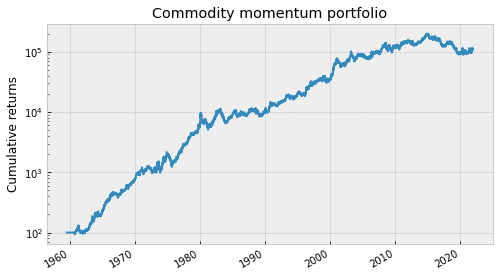

In [6]:
fig, ax = plt.subplots(figsize=(8, 4.5))
portfolio_return.plot(ax=ax, logy=True);
ax.set_title('Commodity momentum portfolio')
ax.set_ylabel('Cumulative returns');

In [7]:
portfolio_return.pipe(Performance).summary()

,Commodity momentum portfolio
CAGR,0.110260
Annualised vol,0.182631
Sharpe ratio,0.603731
Max drawdown,0.551329
Calmar ratio,0.199990
Skewness,-0.147209
Kurtosis,2.634611
Worst return,-0.112480
Worst 1d return,-0.112480
Worst 1w return,-0.137201


## Recent performance

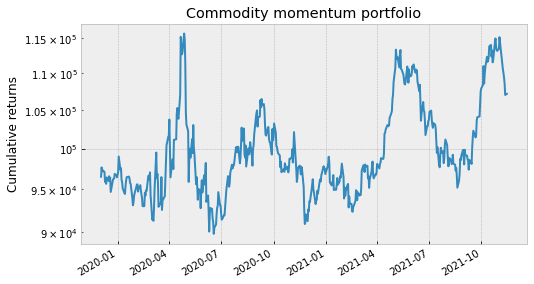

In [8]:
fig, ax = plt.subplots(figsize=(8, 4.5))
portfolio_return.tail(252 * 2).plot(ax=ax, logy=True);
ax.set_title('Commodity momentum portfolio')
ax.set_ylabel('Cumulative returns');

# Reference
- Asness, C.S., Moskowitz, T.J. and Pedersen, L.H., 2013. Value and momentum everywhere. The Journal of Finance, 68(3), pp.929-985.
- Hollstein, F., Prokopczuk, M. and Tharann, B., 2020. Anomalies in commodity futures markets: Risk or mispricing?. Available at SSRN.

In [9]:
print(f'Updated: {datetime.utcnow().strftime("%d-%b-%Y %H:%M")}')

Updated: 16-Nov-2021 06:31
